In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Loading the dataset
admission = pd.read_csv("Admission_Prediction.csv")

# Viewing first 5 rows of the dataset
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
# Dropping the "Serial No from the dataset"
admission.drop(["Serial No."], axis = 1, inplace = True)

In [5]:
# Basic Info about dataset
admission.info()

# Statistical Summary of dataset
admission.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Checking the no of null values per column
admission.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [7]:
# Checking for Percentage of Missing Values
missing  = [feature for feature in admission.columns if admission[feature].isnull().sum()>1 and admission[feature].dtypes!="O"]
for feature in missing:
    print("{}: {}% missing value".format(feature,np.around(admission[feature].isnull().mean(),4)))

GRE Score: 0.03% missing value
TOEFL Score: 0.02% missing value
University Rating: 0.03% missing value


In [8]:
# Imputing the NaN Values with mean
admission["GRE Score"] = admission["GRE Score"].fillna(admission["GRE Score"].mean())
admission["TOEFL Score"] = admission["TOEFL Score"].fillna(admission["TOEFL Score"].mean())

# Imputing the NaN values with median
admission["University Rating"] = admission["University Rating"].fillna(admission["University Rating"].mode()[0])

In [9]:
# Confirming that there is no null values present
admission.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# Visualization the dataset after imputation
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


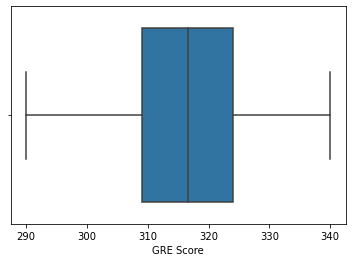

In [11]:
# Checking for outliers in "GRE Score" Column
sns.boxplot(admission["GRE Score"])

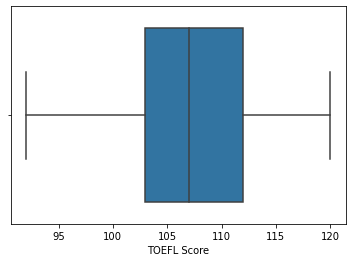

In [12]:
# Checking for outliers in "TOEFL Score" Column
sns.boxplot(admission["TOEFL Score"])

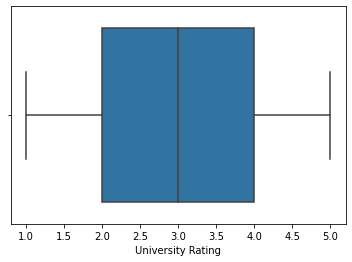

In [13]:
# Checking for outliers in "University Rating" Column
sns.boxplot(admission["University Rating"])

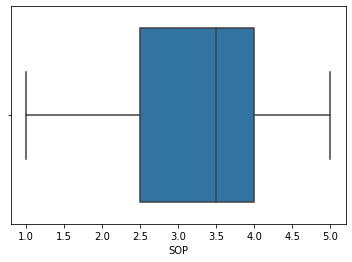

In [14]:
# Checking for outliers in "SOP" Column
sns.boxplot(admission["SOP"])

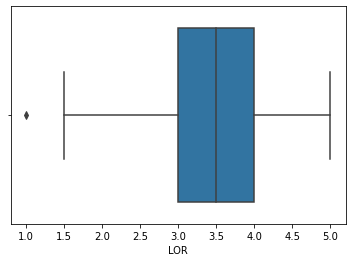

In [15]:
# Checking for outliers in "LOR" Column
sns.boxplot(admission["LOR"])
# Outlier is found. To be treated during model building. 

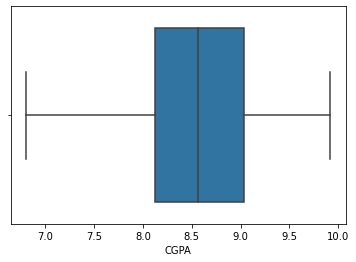

In [16]:
# Checking for outliers in "CGPA" Column
sns.boxplot(admission["CGPA"])

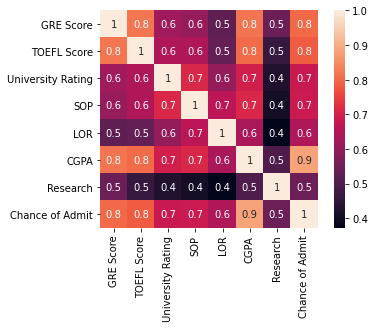

In [17]:
# Plotting Correlation Matrix using Heatmap -->>Finding the co-relation between each features.
sns.heatmap(admission.corr(), annot = True, fmt='.1g', square=True)

In [18]:
# Separating the independent features from the dataframe.
x_data = admission.iloc[:,:-1]

In [19]:
# Performing Normalization using Feature Scaling (Standard Scalar) on independent features only.
Scale = StandardScaler()
x_scale = Scale.fit_transform(x_data)

In [20]:
# Checking for Multicollinearity between features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_scale

vif = pd.DataFrame()
vif["Features"] = x_data.columns
vif["VIF_Values"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif
# Thumb Rule: VIF exceeding 5 or 10 indicates high multicollinearity.

,Features,VIF_Values
0,GRE Score,4.152735
1,TOEFL Score,3.793345
2,University Rating,2.517272
3,SOP,2.776393
4,LOR,2.037449
5,CGPA,4.654369
6,Research,1.459411


In [21]:
admission.to_csv("Admission_Preprocess.csv", index = False)